#**Advanced Dataframe**

**Contents**
1. Indexing Dataframe
2. Dropping Variable/Column
3. Joining Dataframe
4. Concatenate & Append Dataframe
5. Pivot Table Dataframe
6. Melting Dataframe
7. Fungsi Lambda dalam Dataframe

___


In [ ]:
#import library
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("insurance.csv")
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Indexing Dataframe


*   sort_indeks untuk mengurutkan indeks 
suatu data dan datanya ikut tersusun, sedangkan
*   reset_indeks mereset indeks menjadi 0 dan mengurutkan indeksnya tapi datanya tidak tersusun

In [ ]:
random_ = data.sample(n=10)
random_

,age,sex,bmi,children,smoker,region,charges
83,48,female,41.230,4,no,northwest,11033.66170
249,29,male,28.975,1,no,northeast,4040.55825
205,28,female,28.880,1,no,northeast,4337.73520
594,41,male,40.260,0,no,southeast,5709.16440
212,24,male,28.500,2,no,northwest,3537.70300
435,60,male,33.110,3,no,southeast,13919.82290
1167,29,female,24.600,2,no,southwest,4529.47700
285,46,male,26.620,1,no,southeast,7742.10980
1045,43,female,24.700,2,yes,northwest,21880.82000
195,19,male,30.590,0,no,northwest,1639.56310


In [ ]:
#mengurutkan indeks dan datanya
random_.sort_index()

,age,sex,bmi,children,smoker,region,charges
83,48,female,41.230,4,no,northwest,11033.66170
195,19,male,30.590,0,no,northwest,1639.56310
205,28,female,28.880,1,no,northeast,4337.73520
212,24,male,28.500,2,no,northwest,3537.70300
249,29,male,28.975,1,no,northeast,4040.55825
285,46,male,26.620,1,no,southeast,7742.10980
435,60,male,33.110,3,no,southeast,13919.82290
594,41,male,40.260,0,no,southeast,5709.16440
1045,43,female,24.700,2,yes,northwest,21880.82000
1167,29,female,24.600,2,no,southwest,4529.47700


In [ ]:
# mereset index starting from 0
random_.reset_index(drop=True)

,age,sex,bmi,children,smoker,region,charges
0,48,female,41.230,4,no,northwest,11033.66170
1,29,male,28.975,1,no,northeast,4040.55825
2,28,female,28.880,1,no,northeast,4337.73520
3,41,male,40.260,0,no,southeast,5709.16440
4,24,male,28.500,2,no,northwest,3537.70300
5,60,male,33.110,3,no,southeast,13919.82290
6,29,female,24.600,2,no,southwest,4529.47700
7,46,male,26.620,1,no,southeast,7742.10980
8,43,female,24.700,2,yes,northwest,21880.82000
9,19,male,30.590,0,no,northwest,1639.56310


### Dropping Variable/Column

In [ ]:
# dropping column
data.drop(['bmi','children'], axis=1).head()

,age,sex,smoker,region,charges
0,19,female,yes,southwest,16884.92400
1,18,male,no,southeast,1725.55230
2,28,male,no,southeast,4449.46200
3,33,male,no,northwest,21984.47061
4,32,male,no,northwest,3866.85520


In [ ]:
#dropping row / menghapus baris
data2=data.drop(index=[3,4], axis=0)
data2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896


### Joining Dataframe

menggabungkan data berdasarkan indeksnya
Joinnya menggunakan nama kolom yang sama diantara ke 2 data

In [ ]:
data_dummy = data.iloc[:6,0:3]
data_dummy

,age,sex,bmi
0,19,female,27.900
1,18,male,33.770
2,28,male,33.000
3,33,male,22.705
4,32,male,28.880
5,31,female,25.740


In [ ]:
data_5 = data.loc[:3,["age","bmi"]]
data_5

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705


In [ ]:
#join dari data dummy ke data_5
data_dummy.join(data_5,lsuffix='_first',rsuffix='_second')

,age_first,sex,bmi_first,age_second,bmi_second
0,19,female,27.900,19.0,27.900
1,18,male,33.770,18.0,33.770
2,28,male,33.000,28.0,33.000
3,33,male,22.705,33.0,22.705
4,32,male,28.880,NaN,NaN
5,31,female,25.740,NaN,NaN


In [ ]:
#join dari data_5 ke data dummy
data_5.join(data_dummy,lsuffix='_first',rsuffix='_second')

#karena join dari data_5 dan data_5 hanya memiiki sampe indeks 3 maka data yang terjoin sama indeks 3

,age_first,bmi_first,age_second,sex,bmi_second
0,19,27.900,19,female,27.900
1,18,33.770,18,male,33.770
2,28,33.000,28,male,33.000
3,33,22.705,33,male,22.705


### Concatenate & Append Dataframe

In [ ]:
# concatenate data in horizontal (kolom)
datacoba=pd.concat([data_dummy,data_5], axis=1)
datacoba

,age,sex,bmi,age,bmi
0,19,female,27.900,19.0,27.900
1,18,male,33.770,18.0,33.770
2,28,male,33.000,28.0,33.000
3,33,male,22.705,33.0,22.705
4,32,male,28.880,NaN,NaN
5,31,female,25.740,NaN,NaN


In [ ]:
#melihat missing value atau nilai null pada dataset
datacoba.isna()

,age,sex,bmi,age,bmi
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,True,True
5,False,False,False,True,True


In [ ]:
#menghitung nilai null disetiap kolom pada dataset
datacoba.isna().sum()

age    0
sex    0
bmi    0
age    2
bmi    2
dtype: int64

In [ ]:
#menghitung jumlah total keseluruhan tiap kolom yang ada nullnya
datacoba.isna().sum().sum()

4

In [ ]:
#menampilkan berapa persen nilai null pada kolom dataset
round((datacoba.isna().sum()/len(datacoba)*100))

age     0.0
sex     0.0
bmi     0.0
age    33.0
bmi    33.0
dtype: float64

In [ ]:
#menampilkan berapa persen nilai null pada kolom dataset
round((datacoba.isna().sum()/len(datacoba))*100,3) #ambil 3 angka dibelakang koma

age     0.000
sex     0.000
bmi     0.000
age    33.333
bmi    33.333
dtype: float64

In [ ]:
#menampilkan jumlah data yang duplikat
print('data yang duplikat: {}'.format(datacoba.duplicated().sum()))

data yang duplikat: 0


In [ ]:
# concatenate data in vertikal (baris)
pd.concat([data_dummy,data_5], axis=0)

,age,sex,bmi
0,19,female,27.900
1,18,male,33.770
2,28,male,33.000
3,33,male,22.705
4,32,male,28.880
5,31,female,25.740
0,19,NaN,27.900
1,18,NaN,33.770
2,28,NaN,33.000
3,33,NaN,22.705


In [ ]:
# append data
data_5.append(data_dummy)

,age,bmi,sex
0,19,27.900,NaN
1,18,33.770,NaN
2,28,33.000,NaN
3,33,22.705,NaN
0,19,27.900,female
1,18,33.770,male
2,28,33.000,male
3,33,22.705,male
4,32,28.880,male
5,31,25.740,female


### Pivot Table Dataframe

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# pivot table based on charges
pd.pivot_table(data, values="charges", index=["sex","smoker"], columns="region", 
               aggfunc=np.min)

#np.min = Mencari Minimum
#np.max = Mencari Maximum
#np.mean = Mencari Rata-rata

region          northeast    northwest   southeast  southwest
sex    smoker                                                
female no       2196.4732   2117.33885   1607.5101   1727.785
       yes     14283.4594  14711.74380  16577.7795  13844.506
male   no       1694.7964   1621.34020   1121.8739   1241.565
       yes     12829.4551  15817.98570  17043.3414  15820.699

In [ ]:
# pivot table based on bmi
pd.pivot_table(data, values="bmi", index=["sex","smoker"], columns="region", 
               aggfunc=np.max)

region         northeast  northwest  southeast  southwest
sex    smoker                                            
female no         48.070     42.940      46.75       46.7
       yes        42.750     38.950      47.41       47.6
male   no         42.655     41.325      53.13       45.9
       yes        41.895     40.565      52.58       39.9

In [ ]:
pd.pivot_table(data, values="children", index=["sex","smoker"], columns="region", 
               aggfunc=np.sum)

region         northeast  northwest  southeast  southwest
sex    smoker                                            
female no            126        159        150        160
       yes            36         24         34         22
male   no            143        140        141        141
       yes            34         50         57         48

In [ ]:
#pivot tanpa columns, maka hasilnya akan langsung menunjukan total children dari indeks yang ada
pd.pivot_table(data, values="children", index=["sex","smoker"], 
               aggfunc=np.sum)

children
sex    smoker          
female no           595
       yes          116
male   no           565
       yes          189


**Insight Yang didapat**

1.   Hasil observasi data pivot. Dapat ditarik kesimpulan bahwa perokok memiliki biaya rumah sakit terbesar dibandingkan dengan yang tidak merokok.
2.   BMI yang tidak smoker nilainya memiliki nilai yang lebih besar dibanding yang smoker



### Melting Dataframe (Unpivot)

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
data_melt2=data.iloc[:6,0:6]
data_melt2

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
5,31,female,25.740,0,no,southeast


In [ ]:
pd.melt(data_melt2, id_vars=['smoker'], value_vars=['bmi'])

,smoker,variable,value
0,yes,bmi,27.900
1,no,bmi,33.770
2,no,bmi,33.000
3,no,bmi,22.705
4,no,bmi,28.880
5,no,bmi,25.740


In [ ]:
data_melt = data.iloc[:5,:3]
data_melt

,age,sex,bmi
0,19,female,27.900
1,18,male,33.770
2,28,male,33.000
3,33,male,22.705
4,32,male,28.880


In [ ]:
pd.melt(data_melt, id_vars=["sex"], value_vars=["age"])

,sex,variable,value
0,female,age,19
1,male,age,18
2,male,age,28
3,male,age,33
4,male,age,32


### Contoh untuk visualisasi

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
F = data[data['sex']=='female']
M = data[data['sex']=='male']
F

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.68500
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


In [ ]:
F_SW = (F['region']=='southwest').sum()
F_SE = (F['region']=='southeast').sum()
F_NW = (F['region']=='northwest').sum()
F_NE = (F['region']=='northeast').sum()

M_SW = (M['region']=='southwest').sum()
M_SE = (M['region']=='southeast').sum()
M_NW = (M['region']=='northwest').sum()
M_NE = (M['region']=='northeast').sum()

In [ ]:
dict_data =[{'Sex':"Male", "southeast":M_SE, "southwest":M_SW,"northwest":M_NW, "northeast":M_NE},
            {'Sex':'Female',"southeast":F_SE, "southwest":F_SW,"northwest":F_NW, "northeast":F_NE}]

data_sex=pd.DataFrame(dict_data)
data_sex

,Sex,southeast,southwest,northwest,northeast
0,Male,189,163,161,163
1,Female,175,162,164,161


In [ ]:
data_sex_melt = data_sex.melt(id_vars="Sex", value_vars=['southeast','southwest','northwest','northeast'])
data_sex_melt

,Sex,variable,value
0,Male,southeast,189
1,Female,southeast,175
2,Male,southwest,163
3,Female,southwest,162
4,Male,northwest,161
5,Female,northwest,164
6,Male,northeast,163
7,Female,northeast,161


In [ ]:
visualisasi_datasex = data_sex_melt[data_sex_melt["Sex"] == "Male"]

#color palette
ylw = '#fcd12a' # cases - yellow
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan

fig=px.treemap(visualisasi_datasex, path=['variable'], values='value', height=300, width=600, color_discrete_sequence=[ylw, dth, rec])
fig.show()

In [ ]:
visualisasi_datasex = data_sex_melt[data_sex_melt["Sex"] == "Female"]

#color palette
ylw = '#fcd12a' # cases - yellow
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan

fig=px.treemap(visualisasi_datasex, path=['variable'], values='value', height=300, width=600, color_discrete_sequence=[ylw, dth, rec])
fig.show()

In [ ]:
# basic lambda
test = lambda a: a*3
test(10)

30

In [ ]:
# create new variables/columns
curila = []

for i in data['bmi']:
  if i < 26:
    curila.append("Low BMI")
  else:
    curila.append("High BMI")

data_lambda = data.copy()
data_lambda['bmi_category'] = curila
data_lambda.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,High BMI
1,18,male,33.770,1,no,southeast,1725.55230,High BMI
2,28,male,33.000,3,no,southeast,4449.46200,High BMI
3,33,male,22.705,0,no,northwest,21984.47061,Low BMI
4,32,male,28.880,0,no,northwest,3866.85520,High BMI


(array([222., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <a list of 10 Patch objects>)

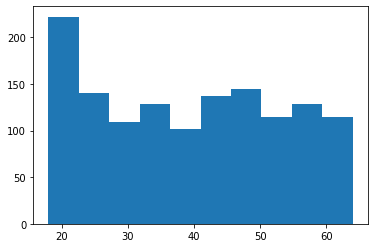

In [ ]:
plt.hist(data['age'])

(array([574.,   0., 324.,   0., 240.,   0., 157.,   0.,  25.,  18.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

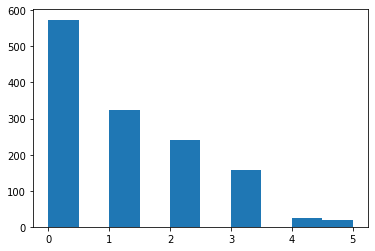

In [ ]:
plt.hist(data['children'])

In [ ]:
data[data['children']==5]

,age,sex,bmi,children,smoker,region,charges
32,19,female,28.600,5,no,southwest,4687.79700
71,31,male,28.500,5,no,northeast,6799.45800
166,20,female,37.000,5,no,southwest,4830.63000
413,25,male,23.900,5,no,southwest,5080.09600
425,45,male,24.310,5,no,southeast,9788.86590
438,52,female,46.750,5,no,southeast,12592.53450
568,49,female,31.900,5,no,southwest,11552.90400
640,33,male,42.400,5,no,southwest,6666.24300
877,33,male,33.440,5,no,southeast,6653.78860
932,46,male,25.800,5,no,southwest,10096.97000


## Exercise

In [ ]:
#Bikin pengelompokkan BMI_category “High BMI” adalah bmi >= 50, “Medium BMI” adalah bmi >= 30 dan < 50, “Low BMI” di bawah < 30
data['bmi_category']=data['bmi'].apply(lambda x:"High BMI" if x>=50 else ("Medium BMI" if x>=30 and x<50 else "Low BMI"))
data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,Low BMI
1,18,male,33.770,1,no,southeast,1725.55230,Medium BMI
2,28,male,33.000,3,no,southeast,4449.46200,Medium BMI
3,33,male,22.705,0,no,northwest,21984.47061,Low BMI
4,32,male,28.880,0,no,northwest,3866.85520,Low BMI


In [ ]:
#min, max, dan mean dari kolom bmi_categ_lambda menggunakan pivot table
pd.pivot_table(data, values="bmi", index=["bmi_category"],aggfunc={"bmi":[min,max,np.mean]})

,max,mean,min
bmi_category,,,
High BMI,53.130,52.030000,50.38
Low BMI,29.925,25.506426,15.96
Medium BMI,49.060,35.194574,30.00


In [ ]:
#min, max, dan mean dari kolom bmi_categ_lambda menggunakan pivot table
pd.pivot_table(data, values="bmi", index=["bmi_category"],columns="region",aggfunc={"bmi":[min,max,np.mean]})

max                                     mean             \
region       northeast northwest southeast southwest  northeast  northwest   
bmi_category                                                                 
High BMI           NaN       NaN     53.13       NaN        NaN        NaN   
Low BMI         29.925    29.925     29.92      29.9  24.900497  25.417599   
Medium BMI      48.070    42.940     49.06      47.6  34.581993  33.723074   

                                         min                                
region        southeast  southwest northeast northwest southeast southwest  
bmi_category                                                                
High BMI      52.030000        NaN       NaN       NaN     50.38       NaN  
Low BMI       26.231818  25.753947    15.960    17.385     19.80      17.4  
Medium BMI    36.714333  34.851445    30.115    30.020     30.03      30.0

In [ ]:
# 3. (Optional) set the bmi_categ_lambda, sex, and region in upper char
data[["bmi_category"]] = data.apply(lambda x:x[["bmi_category"]].str.upper(), axis=1)
data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,LOW BMI
1,18,male,33.770,1,no,southeast,1725.55230,MEDIUM BMI
2,28,male,33.000,3,no,southeast,4449.46200,MEDIUM BMI
3,33,male,22.705,0,no,northwest,21984.47061,LOW BMI
4,32,male,28.880,0,no,northwest,3866.85520,LOW BMI
